In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from fastai import *
from fastai.vision import *
from fastai.callbacks import *

np.random.seed(42)

#from annoy import AnnoyIndex

import glob

In [ ]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

## Create Dfs

In [ ]:
PATH = '/gdrive/MyDrive/의류 추천 시스템/DeepFashion/Category and Attribute Prediction Benchmark/'

In [ ]:
img_partitions = pd.read_csv(PATH + 'Eval/list_eval_partition.txt', delim_whitespace=True, header=1)

In [ ]:
img_partitions.head()

,image_name,evaluation_status
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,train
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,train
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,val
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,train
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,test


In [ ]:
attributes = pd.read_csv(PATH + 'Anno_coarse/list_attr_cloth.txt', sep='\s{2,}', header=0, skiprows=[0], engine='python')

In [ ]:
attributes.head()

,attribute_name,attribute_type
0,a-line,3
1,abstract,1
2,abstract chevron,1
3,abstract chevron print,1
4,abstract diamond,1


In [ ]:
attributes_imgs = pd.read_csv(PATH + 'Anno_coarse/list_attr_img.txt', delim_whitespace=True, header=0, skiprows=[0], names=(['image_name']+attributes['attribute_name'].tolist()))
attributes_imgs.replace([-1,0,1], [False, False, True], inplace=True)

In [ ]:
attributes_imgs.head()

,image_name,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,abstract geo,abstract geo print,abstract paisley,abstract pattern,abstract print,abstract printed,abstract stripe,acid,acid wash,americana,angeles,animal,animal print,ankle,applique,arrow collar,art,asymmetric,asymmetrical,asymmetrical hem,athletic,audrey,babe,babydoll,back bow,back cutout,back knit,back lace,back striped,backless,baja,bandage,bandana,bandana print,barbie,baroque,baroque print,baseball,basic,basquiat,batwing,beach,bead,beaded,beaded chiffon,beaded collar,beaded sheer,beaded shift,beatles,bed,bejeweled,bell,bell-sleeve,bella,belted,belted chiffon,belted floral,belted floral print,belted lace,belted maxi,belted plaid,bermuda,bib,big,bike,biker,bird,bird print,blah,bleach,bleached,bleached denim,blurred,boat neck,bodycon,bodycon midi,boho,bold,botanical,botanical print,bow,bow-back,bow-front,box,box pleat,box-pleated,boxy,boxy crop,boxy knit,boxy lace,boxy pocket,boxy striped,boyfriend,braided,breton,breton stripe,brocade,brooklyn,brooklyn nets,brushstroke,brushstroke print,burnout,bustier,butterfly,butterfly print,button,button-front,buttoned,cable,cable knit,cable-knit,caged,california,camera,cami,cami crop,cami maxi,camo,camouflage,candy,canvas,cap-sleeve,capri,cardio,cargo,cat,chambray,chambray drawstring,checked,checkered,cheetah,chenille,chevron,chevron print,chic,chiffon,chiffon floral,chiffon lace,chiffon layered,chiffon maxi,chiffon paneled,chiffon pleated,chiffon shift,chiffon shirt,chiffon surplice,chiffon-paneled,chino,chunky,chunky knit,cinched,circle,cities,city,civil,clashist,classic,classic cotton,classic crew,classic crew neck,classic denim,classic fit,classic knit,classic pocket,classic skinny,classic striped,classic v-neck,classic woven,clean,clean wash,cloud,cloud wash,coast,coated,coffee,collar,collar lace,collared,collarless,collarless faux,colorblock,colorblock pocket,colorblocked,combo,combo maxi,contrast,contrast trim,contrast-trimmed,convertible,corduroy,cotton,cotton drawstring,cotton knit,cotton-blend,cover-up,cowl,cowl neck,cozy,crepe,crepe shift,crepe woven,crew,crew neck,crinkled,crisscross,crisscross-back,crochet,crochet crop,crochet embroidered,crochet floral,crochet fringe,crochet knit,crochet lace,crochet maxi,crochet mesh,crochet overlay,crochet-paneled,crochet-trimmed,crocheted,crocheted lace,crop,cropped,cropped knit,cross-back,crossback,cuffed,cuffed denim,cuffed-sleeve,curved,curved hem,cut,cute,cutoff,cutout,cutout lace,cutout maxi,cutout sheath,cutout-back,dainty,daisy,daisy print,damask,daring,dark,darling,deep v-neck,deep-v,defyant,denim,denim drawstring,denim pencil,denim shift,denim shirt,denim skater,denim utility,desert,destroyed,devil,diamond,diamond print,dip-dye,dip-dyed,distressed,distressed low-rise,distressed mid-rise,distressed skinny,ditsy,ditsy floral,ditsy floral print,doll,dolman,dolman sleeve,dolman-sleeve,dolphin,dolphin hem,doodle,dot,dots,dotted,double-breasted,drape-front,draped,draped open-front,draped shawl,draped surplice,drapey,drawstring,dream,dreamcatcher,dreamer,drop waist,drop-sleeve,drop-waist,dropped,dye,dynamite,eagle,edge,eiffel,elasticized,elegant,elephant,elephant print,embellished,embroidered,embroidered fit,embroidered floral,embroidered gauze,embroidered gauze peasant,embroidered lace,embroidered maxi,embroidered mesh,embroidered peasant,embroidered shift,embroidered woven,embroidery,enchanted,ethereal,everyday,eyelash,eyelash knit,eyelash lace,eyelet,eyelet fit,faded,fair,fair isle,fan,fancy,faux,faux fur,faux leather,faux leather mini,faux leather moto,faux leather paneled,faux leather pencil,faux leather skater,faux leather varsity,faux leather-paneled,faux leather-trimmed,faux shearling,faux suede,faux-wrap,feather,festive,field,fisherman,fit,fit flare,fit skinny,fitted,fitted v-neck,flare,flared,flat,flat front,flat-front,flawless,flirty,floral,floral flutter,floral knit,floral lace,floral lace mini,floral l

In [ ]:
attributes_df = attributes_imgs.merge(img_partitions, how='left', on='image_name')

In [ ]:
attributes_df.head()

,image_name,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,abstract geo,abstract geo print,abstract paisley,abstract pattern,abstract print,abstract printed,abstract stripe,acid,acid wash,americana,angeles,animal,animal print,ankle,applique,arrow collar,art,asymmetric,asymmetrical,asymmetrical hem,athletic,audrey,babe,babydoll,back bow,back cutout,back knit,back lace,back striped,backless,baja,bandage,bandana,bandana print,barbie,baroque,baroque print,baseball,basic,basquiat,batwing,beach,bead,beaded,beaded chiffon,beaded collar,beaded sheer,beaded shift,beatles,bed,bejeweled,bell,bell-sleeve,bella,belted,belted chiffon,belted floral,belted floral print,belted lace,belted maxi,belted plaid,bermuda,bib,big,bike,biker,bird,bird print,blah,bleach,bleached,bleached denim,blurred,boat neck,bodycon,bodycon midi,boho,bold,botanical,botanical print,bow,bow-back,bow-front,box,box pleat,box-pleated,boxy,boxy crop,boxy knit,boxy lace,boxy pocket,boxy striped,boyfriend,braided,breton,breton stripe,brocade,brooklyn,brooklyn nets,brushstroke,brushstroke print,burnout,bustier,butterfly,butterfly print,button,button-front,buttoned,cable,cable knit,cable-knit,caged,california,camera,cami,cami crop,cami maxi,camo,camouflage,candy,canvas,cap-sleeve,capri,cardio,cargo,cat,chambray,chambray drawstring,checked,checkered,cheetah,chenille,chevron,chevron print,chic,chiffon,chiffon floral,chiffon lace,chiffon layered,chiffon maxi,chiffon paneled,chiffon pleated,chiffon shift,chiffon shirt,chiffon surplice,chiffon-paneled,chino,chunky,chunky knit,cinched,circle,cities,city,civil,clashist,classic,classic cotton,classic crew,classic crew neck,classic denim,classic fit,classic knit,classic pocket,classic skinny,classic striped,classic v-neck,classic woven,clean,clean wash,cloud,cloud wash,coast,coated,coffee,collar,collar lace,collared,collarless,collarless faux,colorblock,colorblock pocket,colorblocked,combo,combo maxi,contrast,contrast trim,contrast-trimmed,convertible,corduroy,cotton,cotton drawstring,cotton knit,cotton-blend,cover-up,cowl,cowl neck,cozy,crepe,crepe shift,crepe woven,crew,crew neck,crinkled,crisscross,crisscross-back,crochet,crochet crop,crochet embroidered,crochet floral,crochet fringe,crochet knit,crochet lace,crochet maxi,crochet mesh,crochet overlay,crochet-paneled,crochet-trimmed,crocheted,crocheted lace,crop,cropped,cropped knit,cross-back,crossback,cuffed,cuffed denim,cuffed-sleeve,curved,curved hem,cut,cute,cutoff,cutout,cutout lace,cutout maxi,cutout sheath,cutout-back,dainty,daisy,daisy print,damask,daring,dark,darling,deep v-neck,deep-v,defyant,denim,denim drawstring,denim pencil,denim shift,denim shirt,denim skater,denim utility,desert,destroyed,devil,diamond,diamond print,dip-dye,dip-dyed,distressed,distressed low-rise,distressed mid-rise,distressed skinny,ditsy,ditsy floral,ditsy floral print,doll,dolman,dolman sleeve,dolman-sleeve,dolphin,dolphin hem,doodle,dot,dots,dotted,double-breasted,drape-front,draped,draped open-front,draped shawl,draped surplice,drapey,drawstring,dream,dreamcatcher,dreamer,drop waist,drop-sleeve,drop-waist,dropped,dye,dynamite,eagle,edge,eiffel,elasticized,elegant,elephant,elephant print,embellished,embroidered,embroidered fit,embroidered floral,embroidered gauze,embroidered gauze peasant,embroidered lace,embroidered maxi,embroidered mesh,embroidered peasant,embroidered shift,embroidered woven,embroidery,enchanted,ethereal,everyday,eyelash,eyelash knit,eyelash lace,eyelet,eyelet fit,faded,fair,fair isle,fan,fancy,faux,faux fur,faux leather,faux leather mini,faux leather moto,faux leather paneled,faux leather pencil,faux leather skater,faux leather varsity,faux leather-paneled,faux leather-trimmed,faux shearling,faux suede,faux-wrap,feather,festive,field,fisherman,fit,fit flare,fit skinny,fitted,fitted v-neck,flare,flared,flat,flat front,flat-front,flawless,flirty,floral,floral flutter,floral knit,floral lace,floral lace mini,floral l

In [ ]:
# 1 = Texture, 2 = Fabric, 3 = Shape, 4 = Parts, 5 = Style
list_attr_names = ['image_name']+attributes[(attributes['attribute_type']==2)]['attribute_name'].tolist()

In [ ]:
training_df = attributes_df[attributes_df['evaluation_status'].isin(['train', 'val'])][list_attr_names].copy()
training_df.reset_index(drop=True, inplace=True)

In [ ]:
# label 없는거(다 False인거) 삭제
training_df['max'] = [training_df.iloc[x][1:].max() for x in training_df.index.tolist()]
training_df = training_df[training_df['max'].isin([True])].copy()
training_df.drop('max', axis=1, inplace=True)

In [ ]:
training_df.shape

(131770, 219)

In [ ]:
training_df['lace'].value_counts().to_frame()

,lace
False,114172
True,17598


In [ ]:
# attribute별 갯수
def count_attr_imgs(attr_df):
  col_counts={}

  for col in attr_df.columns[1:]:
    col_counts[col] = attr_df[col].value_counts().to_frame().loc[True][0]
  
  col_df = pd.DataFrame.from_dict(col_counts, orient='index', columns=['Count'])
  return col_df

## Data Cleaning

(array([  0,   1,   2,   3, ..., 214, 215, 216, 217]),
 <a list of 218 Text major ticklabel objects>)

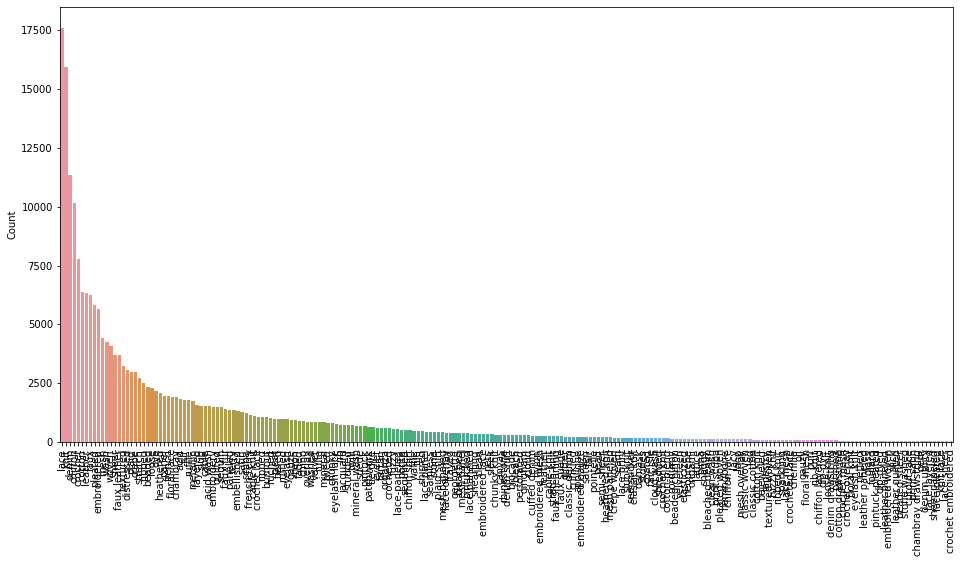

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(x=count_attr_imgs(training_df).sort_values(by='Count', ascending=False).index, y = count_attr_imgs(training_df).sort_values(by='Count', ascending=False)['Count'])
plt.xticks(rotation=90)

In [ ]:
# 피처 50개만
drop_feature = count_attr_imgs(training_df).sort_values(by='Count',ascending=True).index[:168].tolist()
len(drop_feature)

168

In [ ]:
training_df50 = training_df.drop(drop_feature, axis=1)
training_df50.reset_index(inplace=True, drop=True)
training_df50['max'] = [training_df50.iloc[x][1:].max() for x in training_df50.index.tolist()]
training_df50 = training_df50[training_df50['max'].isin([True])].copy()
training_df50.drop('max', axis=1, inplace=True)
training_df50.head()

,image_name,acid,acid wash,beaded,cable,cable knit,chambray,chiffon,cotton,crepe,crochet,crochet lace,denim,distressed,dye,embellished,embroidered,embroidery,faux,faux fur,faux leather,floral lace,french,french terry,fur,heathered,knit,lace,layered,leather,loose,mesh,metallic,panel,paneled,plaid,pleated,quilted,ribbed,ripped,ruffle,satin,scuba,sequin,sheer,slub,stretch,terry,textured,wash,woven
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,img/Sheer_Pleated-Front_Blouse/img_00000006.jpg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,img/Sheer_Pleated-Front_Blouse/img_00000009.jpg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [ ]:
training_df50.shape

(115094, 51)

### 상위 10개 항목 5000개로

In [ ]:
df_test = training_df50.copy()

In [ ]:
df_test.shape

(115094, 51)

In [ ]:
top10_index = count_attr_imgs(df_test).sort_values(by='Count',ascending=False).index[:10].tolist()
top10_index

['lace',
 'knit',
 'denim',
 'chiffon',
 'crochet',
 'cotton',
 'leather',
 'faux',
 'pleated',
 'embroidered']

In [ ]:
count_attr_imgs(df_test).sort_values(by='Count',ascending=False)[:10]

,Count
lace,17598
knit,15932
denim,11361
chiffon,10139
crochet,7762
cotton,6379
leather,6315
faux,6262
pleated,5808
embroidered,5636


In [ ]:
embroidered_drop = df_test[df_test[top10_index[9]]==True].sample(n=636, random_state=0).index.tolist()
df_test.drop(embroidered_drop, inplace=True)

In [ ]:
pleated_drop = df_test[df_test[top10_index[8]]==True].sample(n=804, random_state=0).index.tolist()
df_test.drop(pleated_drop, inplace=True)

In [ ]:
faux_drop = df_test[df_test[top10_index[7]]==True].sample(n=1242, random_state=0).index.tolist()
df_test.drop(faux_drop, inplace=True)

In [ ]:
leather_drop = df_test[df_test[top10_index[6]]==True].sample(n=524, random_state=0).index.tolist()
df_test.drop(leather_drop, inplace=True)

In [ ]:
cotton_drop = df_test[df_test[top10_index[5]]==True].sample(n=1327, random_state=0).index.tolist()
df_test.drop(cotton_drop, inplace=True)

In [ ]:
crochet_drop = df_test[df_test[top10_index[4]]==True].sample(n=2652, random_state=0).index.tolist()
df_test.drop(crochet_drop, inplace=True)

In [ ]:
chiffon_drop = df_test[df_test[top10_index[3]]==True].sample(n=4795, random_state=0).index.tolist()
df_test.drop(chiffon_drop, inplace=True)

In [ ]:
denim_drop = df_test[df_test[top10_index[2]]==True].sample(n=6143, random_state=0).index.tolist()
df_test.drop(denim_drop, inplace=True)

In [ ]:
knit_drop = df_test[df_test[top10_index[1]]==True].sample(n=9432, random_state=0).index.tolist()
df_test.drop(knit_drop, inplace=True)

In [ ]:
lace_drop = df_test[df_test[top10_index[0]]==True].sample(n=9586, random_state=0).index.tolist()
df_test.drop(lace_drop, inplace=True)

In [ ]:
count_attr_imgs(df_test).sort_values(by='Count',ascending=False)[:10]

,Count
lace,6000
knit,5904
denim,4859
leather,4649
chiffon,4609
cotton,4495
faux,4433
pleated,4207
embroidered,4185
mesh,3862


In [ ]:
count_attr_imgs(df_test).sort_values(by='Count',ascending=False).sum()

Count    112119
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
        28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

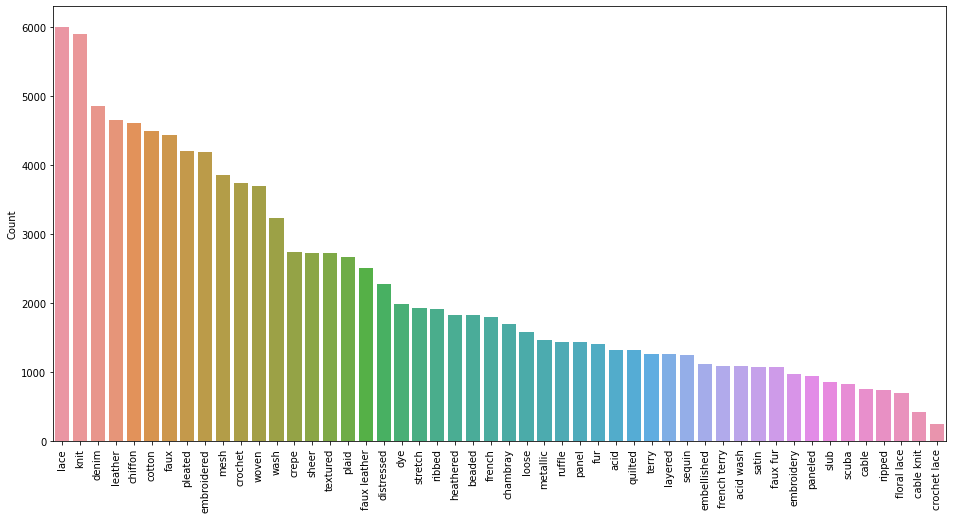

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=count_attr_imgs(df_test).sort_values(by='Count', ascending=False).index, y=count_attr_imgs(df_test).sort_values(by='Count', ascending=False)['Count'])
plt.xticks(rotation=90)

In [ ]:
df_test.shape

(77953, 51)

In [ ]:
df_test.to_csv('/gdrive/MyDrive/의류 추천 시스템/AI/tdf/tdf_fabric50.csv')

## Modeling

In [ ]:
from fastai import *
from fastai.vision import *
import tensorflow as tf

np.random.seed(42)

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# data augmentation
#ds_tfms = get_transforms()

In [ ]:
label_column_names = df_test.columns.tolist()[1:]

img_base_path = Path('/gdrive/MyDrive/의류 추천 시스템/AI/')
data = ImageDataBunch.from_df(img_base_path, df_test, size=150, label_col = label_column_names)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (62363 items)
x: ImageList
Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150)
y: MultiCategoryList
pleated;sheer,pleated,pleated,sheer,sheer;woven
Path: /gdrive/MyDrive/의류 추천 시스템/AI;

Valid: LabelList (15590 items)
x: ImageList
Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150)
y: MultiCategoryList
cotton;textured,chiffon;lace;paneled,cotton,heathered,woven
Path: /gdrive/MyDrive/의류 추천 시스템/AI;

Test: None

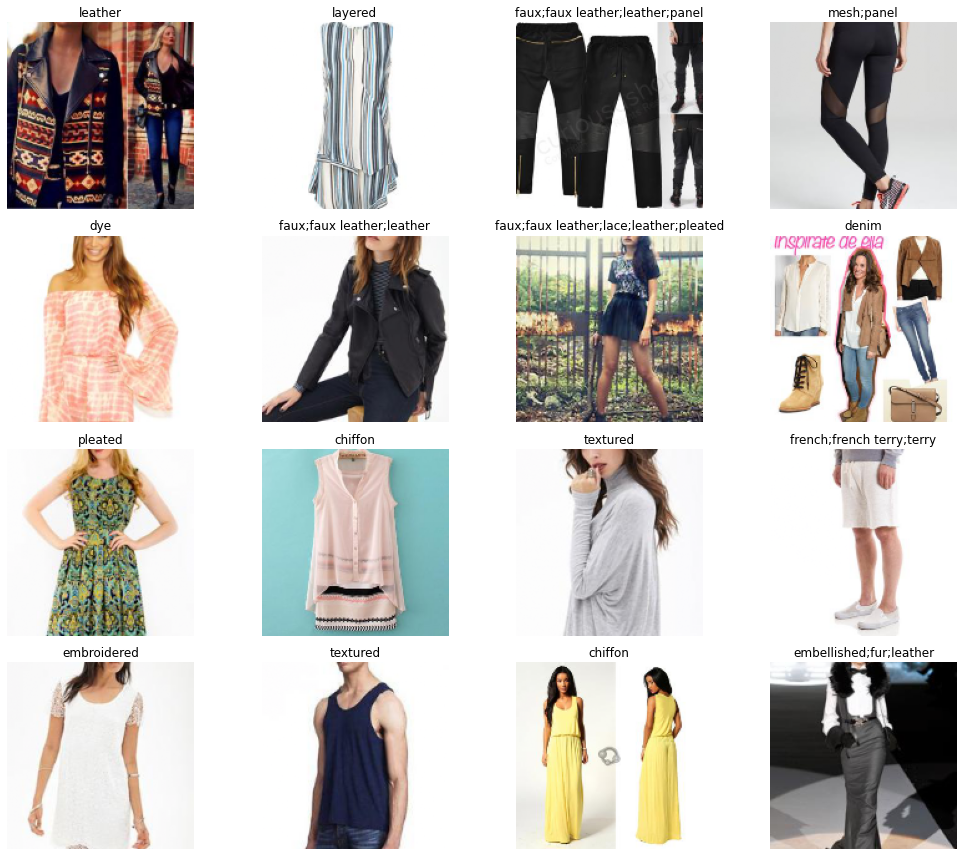

In [ ]:
data.show_batch(rows=4, figsize=(14,12))

In [ ]:
print(data.classes)
len(data.classes)

['acid', 'acid wash', 'beaded', 'cable', 'cable knit', 'chambray', 'chiffon', 'cotton', 'crepe', 'crochet', 'crochet lace', 'denim', 'distressed', 'dye', 'embellished', 'embroidered', 'embroidery', 'faux', 'faux fur', 'faux leather', 'floral lace', 'french', 'french terry', 'fur', 'heathered', 'knit', 'lace', 'layered', 'leather', 'loose', 'mesh', 'metallic', 'panel', 'paneled', 'plaid', 'pleated', 'quilted', 'ribbed', 'ripped', 'ruffle', 'satin', 'scuba', 'sequin', 'sheer', 'slub', 'stretch', 'terry', 'textured', 'wash', 'woven']


50

In [ ]:
acc_02 = partial(accuracy_thresh, thresh=0.1)
f_score = partial(fbeta, thresh=0.1)

In [ ]:
checkpoint_path = '/gdrive/MyDrive/의류 추천 시스템/AI/fabric_ckp/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=[acc_02, f_score], callback_fns=ShowGraph)

In [ ]:
learn.fit_one_cycle(5)

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.130722,0.116955,0.949418,0.192383,4:52:06


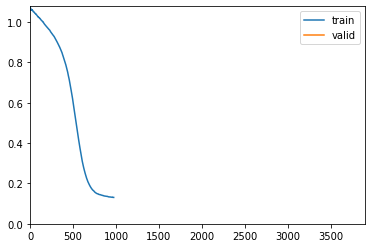

In [ ]:
learn.fit_one_cycle(4, slice(1e-5, 1e-3))

In [ ]:
learn.save('fabric-resnet50-size150-fr5-unfr4-50', return_path=True)
learn.export('fabric-resnet50-size150-fr5-unfr4-50.pkl')

In [ ]:
learn = load_learner('/gdrive/MyDrive/의류 추천 시스템/AI/','fabric-resnet50-size150-fr5-unfr4-50.pkl')

[('chiffon', 0.1871444433927536), ('pleated', 0.13006605207920074), ('embroidered', 0.09752547740936279), ('lace', 0.07095829397439957), ('cotton', 0.05896700173616409)]


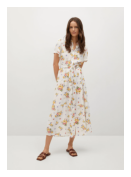

In [ ]:
predict_img_path = "/gdrive/MyDrive/의류 추천 시스템/AI/test/floral_dress.jpg" 
category,classIndex,losses = learn.predict(open_image(predict_img_path))
predictions = sorted(zip(data.classes, map(float, losses)), key=lambda p: p[1], reverse=True)
print (predictions[:5])
show_image(open_image(predict_img_path))

# "/data/Michael/data/predict/2.png"

## Test?

In [ ]:
test_df = attributes_df[attributes_df['evaluation_status'].isin(['test'])][list_attr_names].copy()
test_df.reset_index(drop=True, inplace=True)

In [ ]:
# label 없는거(다 False인거) 삭제
test_df['max'] = [test_df.iloc[x][1:].max() for x in test_df.index.tolist()]
test_df = test_df[test_df['max'].isin([True])].copy()
test_df.drop('max', axis=1, inplace=True)

In [ ]:
test_df.shape

(21105, 219)

In [ ]:
test_df

,image_name,acid,acid wash,applique,bead,beaded,beaded chiffon,beaded sheer,bejeweled,bleach,bleached,bleached denim,brocade,burnout,cable,cable knit,cable-knit,canvas,chambray,chambray drawstring,chenille,chiffon,chiffon lace,chiffon layered,chiffon shirt,chino,chunky,chunky knit,classic cotton,classic denim,classic knit,classic woven,clean,clean wash,cloud,cloud wash,coated,corduroy,cotton,cotton drawstring,cotton knit,cotton-blend,crepe,crepe woven,crinkled,crochet,crochet embroidered,crochet knit,crochet lace,crochet mesh,crochet overlay,crocheted,crocheted lace,cuffed denim,cutout lace,damask,denim,denim drawstring,denim shirt,denim utility,dip-dye,dip-dyed,distressed,dye,elasticized,embellished,embroidered,embroidered gauze,embroidered lace,embroidered mesh,embroidered woven,embroidery,eyelash,eyelash knit,eyelash lace,eyelet,faded,fair,fair isle,faux,faux fur,faux leather,faux shearling,faux suede,feather,floral knit,floral lace,floral mesh,foulard,frayed,french,french terry,fur,fuzzy,fuzzy knit,gauze,gauzy,gem,georgette,gingham,glass,glitter,heathered,heathered knit,herringbone,jacquard,knit,knit lace,lace,lace layered,lace mesh,lace overlay,lace panel,lace paneled,lace pleated,lace print,lace sheer,lace-paneled,lacy,lattice,layered,leather,leather paneled,leather quilted,leather-paneled,led,loop,loose,loose-knit,mesh,mesh overlay,mesh panel,mesh paneled,mesh-paneled,metallic,mineral,mineral wash,neon,neoprene,nets,netted,nylon,oil,organza,origami,overlay,panel,paneled,patched,patchwork,perforated,pima,pintuck,pintuck pleated,pintucked,plaid,plaid shirt,pleat,pleated,pleated woven,pointelle,ponte,print satin,print scuba,purl,quilted,rhinestone,rib,rib-knit,ribbed,ribbed-knit,ripped,ruched,ruffle,ruffled,sateen,satin,scuba,seam,seamless,seersucker,semi-sheer,sequin,sequined,shaggy,shearling,sheer,sheer-paneled,shirred,shredded,sleek,slick,slub,slub-knit,sparkling,stone,stone washed,stones,stretch,stretch-knit,studded,suede,tapestry,tartan,terry,textured,textured woven,tie-dye,tiered,tile,tulle,tweed,twill,velvet,velveteen,waffle,wash,washed,woven
0,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,img/Sheer_Pleated-Front_Blouse/img_00000007.jpg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [ ]:
# 피처 50개만
drop_feature = count_attr_imgs(training_df).sort_values(by='Count',ascending=True).index[:168].tolist()
len(drop_feature)

168

In [ ]:
test_df50 = test_df.drop(drop_feature, axis=1)
test_df50.reset_index(inplace=True, drop=True)
test_df50['max'] = [test_df50.iloc[x][1:].max() for x in test_df50.index.tolist()]
test_df50 = test_df50[test_df50['max'].isin([True])].copy()
test_df50.drop('max', axis=1, inplace=True)
test_df50.head()

,image_name,acid,acid wash,beaded,cable,cable knit,chambray,chiffon,cotton,crepe,crochet,crochet lace,denim,distressed,dye,embellished,embroidered,embroidery,faux,faux fur,faux leather,floral lace,french,french terry,fur,heathered,knit,lace,layered,leather,loose,mesh,metallic,panel,paneled,plaid,pleated,quilted,ribbed,ripped,ruffle,satin,scuba,sequin,sheer,slub,stretch,terry,textured,wash,woven
0,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,img/Sheer_Pleated-Front_Blouse/img_00000007.jpg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,img/Sheer_Pleated-Front_Blouse/img_00000013.jpg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,img/Sheer_Pleated-Front_Blouse/img_00000019.jpg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,img/Sheer_Pleated-Front_Blouse/img_00000020.jpg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [ ]:
test_df50.shape

(18521, 51)

In [ ]:
test_df50['image_name'][0]

'img/Sheer_Pleated-Front_Blouse/img_00000005.jpg'

In [ ]:
PATH = '/gdrive/MyDrive/의류 추천 시스템/AI/'

In [ ]:
learn = load_learner('/gdrive/MyDrive/의류 추천 시스템/AI/','fabric-resnet50-size150-fr5-unfr4-50.pkl')

In [ ]:
test_df50.loc[2,test_df.loc[2]==True].index

Index(['sheer'], dtype='object')

[('leather', 0.14479893445968628), ('faux', 0.10534478724002838), ('chiffon', 0.09676962345838547), ('faux leather', 0.08750039339065552), ('knit', 0.08413196355104446)]


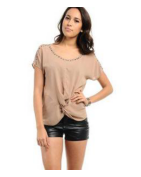

In [ ]:
predict_img_path = PATH + test_df50['image_name'][2]
category,classIndex,losses = learn.predict(open_image(predict_img_path))
predictions = sorted(zip(data.classes, map(float, losses)), key=lambda p: p[1], reverse=True)
print (predictions[:5])
show_image(open_image(predict_img_path))